# Covid 19 case analysis

# importing libraries

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import plotly.express as px

# importing covid-19 case Dataset

In [ ]:
cd_data= pd.read_csv ("Downloads/Covid_19_cases4.csv")

In [ ]:
cd_data

In [25]:
cd_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria


In [26]:
cd_data.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
2725,06-03-2021,6,3,2021,3455,17,Sweden
2726,05-03-2021,5,3,2021,4069,12,Sweden
2727,04-03-2021,4,3,2021,4884,14,Sweden
2728,03-03-2021,3,3,2021,4876,19,Sweden
2729,02-03-2021,2,3,2021,6191,19,Sweden


In [27]:
cd_data.shape

(2730, 7)

In [28]:
cd_data.describe()

,day,month,year,cases,deaths
count,2730.000000,2730.000000,2730.0,2730.000000,2730.000000
mean,16.000000,4.010989,2021.0,3661.010989,65.291941
std,8.765919,0.818813,0.0,6490.510073,113.956634
min,1.000000,3.000000,2021.0,-2001.000000,-3.000000
25%,8.000000,3.000000,2021.0,361.250000,2.000000
50%,16.000000,4.000000,2021.0,926.500000,14.500000
75%,24.000000,5.000000,2021.0,3916.250000,72.000000
max,31.000000,5.000000,2021.0,53843.000000,956.000000


In [29]:
cd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  2730 non-null   object
 1   day                      2730 non-null   int64 
 2   month                    2730 non-null   int64 
 3   year                     2730 non-null   int64 
 4   cases                    2730 non-null   int64 
 5   deaths                   2730 non-null   int64 
 6   countriesAndTerritories  2730 non-null   object
dtypes: int64(5), object(2)
memory usage: 149.4+ KB


# Data Preprocessing

In [30]:
cd_data.notnull().sum()

dateRep                    2730
day                        2730
month                      2730
year                       2730
cases                      2730
deaths                     2730
countriesAndTerritories    2730
dtype: int64

In [31]:
#There is no missing value in our dataset

In [32]:
cd_data.duplicated().sum()

0

In [33]:
#There is no duplicate values in our dataset

In [64]:
mean = np.mean(cd_data)
mean

C:\Users\rajiv\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\rajiv\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


day         16.000000
month        4.010989
year      2021.000000
cases     3661.010989
deaths      65.291941
dtype: float64

In [65]:
std_dev = np.std(cd_data)
std_dev

C:\Users\rajiv\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


day          8.764313
month        0.818663
year         0.000000
cases     6489.321226
deaths     113.935761
dtype: float64

# Data visualization

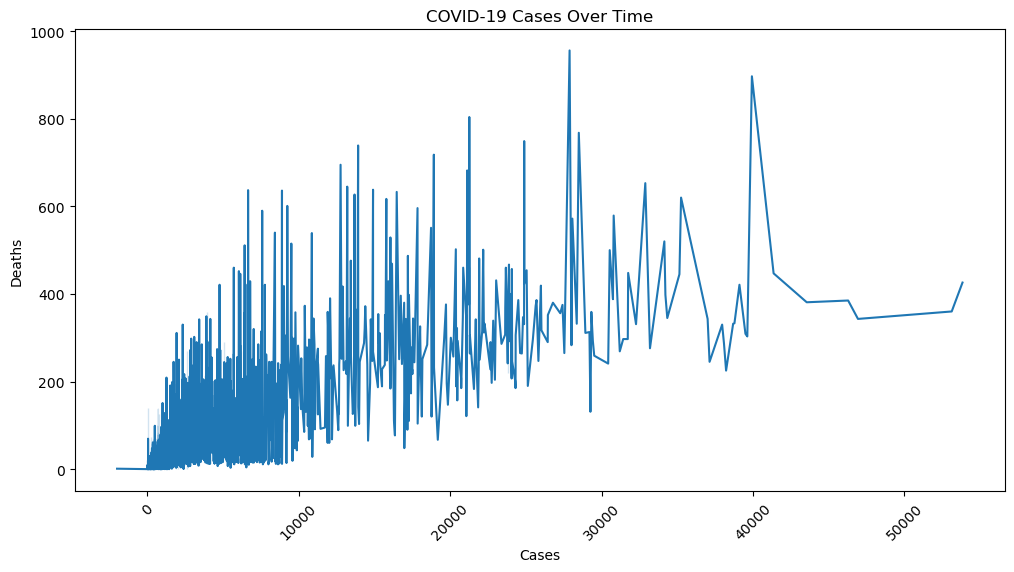

In [89]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='cases', y='deaths', data=cd_data)
plt.title("COVID-19 Cases Over Time")
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.xticks(rotation=45)
plt.show()


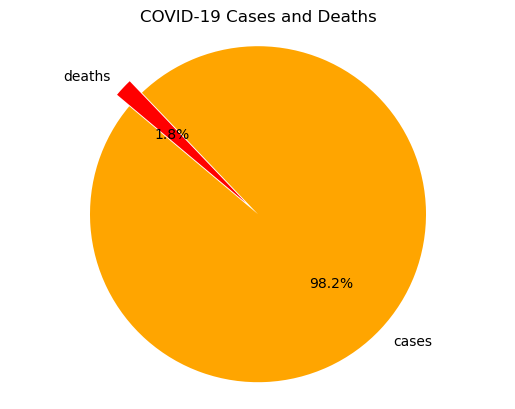

In [74]:
total_cases = cd_data['cases'].sum()
total_deaths = cd_data['deaths'].sum()
labels = ['cases', 'deaths']
sizes = [total_cases, total_deaths]
colors = ['orange', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('COVID-19 Cases and Deaths')
plt.show()

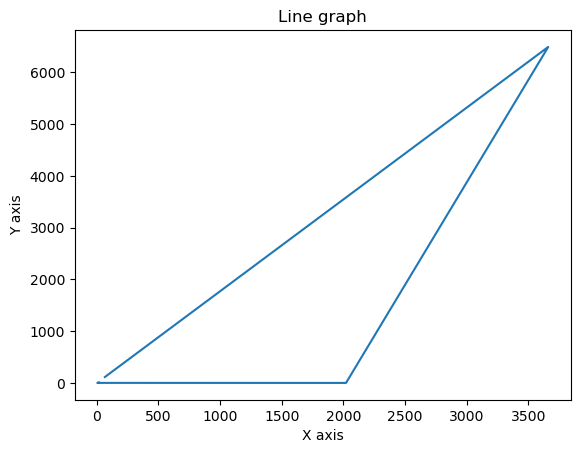

In [66]:
from matplotlib import pyplot as plt
x = mean
y = std_dev
plt.plot(mean,std_dev)
plt.title("Line graph")
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

Text(0.5, 1.0, 'COVID-19 CASE ANALYSIS')

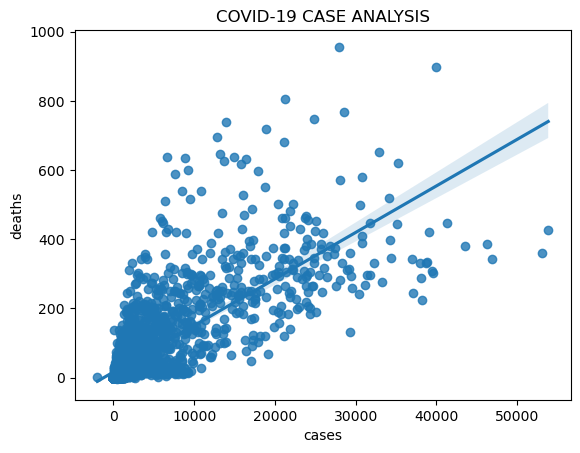

In [103]:
sns.regplot(x='cases',y='deaths',data=cd_data);
plt.title("COVID-19 CASE ANALYSIS")


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y=cd_data[['deaths']]
x=cd_data[['cases']]

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [92]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2184, 2), (546, 2), (2184, 1), (546, 1))

In [93]:
lr=LinearRegression()
     

In [94]:
lr.fit(X_train, y_train)

LinearRegression()